In [1]:
from __future__ import print_function
import pandas as pd
import numpy as np
import os
import matplotlib as pl
import zipfile

%pylab inline

Populating the interactive namespace from numpy and matplotlib


# IDEA:
## Younger people are more likely than elder people to bike for longer duration

## NULL HYPOTHESIS:

### The ratio of elder people for longer trip duration over elder people for shorter trip duration is the same or higher than the ratio of younger people for longer trip duration over younger people for shorter trip duration

## ALTERNATIVE HYPOTHESIS:

### The ratio of elder people for longer trip duration over elder people for shorter trip duration is lower than the ratio of younger people for longer trip duration over younger people for shorter trip duration

H0 : Senior_LongerTrip / Senior_All >= Young_LongTrip / Young_All 

HA : Senior_LongerTrip / Senior_All < Young_LongTrip / Young_All

### I will use a significance level: alpha = 0.05, which means i want the probability of getting a result at least as significant as mine to be less then 5%

In [13]:
#learning this method from Bailey Griswold, one member in our study group
data_date = '201502'
!curl -O "https://s3.amazonaws.com/tripdata/{data_date}-citibike-tripdata.zip"

zf = zipfile.ZipFile(data_date + '-citibike-tripdata.zip')
df= pd.read_csv(zf.open(data_date + '-citibike-tripdata.csv'))

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 4708k  100 4708k    0     0  8830k      0 --:--:-- --:--:-- --:--:-- 12.3M


In [14]:
df.head(n=10)

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,801,2/1/2015 0:00,2/1/2015 0:14,521,8 Ave & W 31 St,40.750450,-73.994811,423,W 54 St & 9 Ave,40.765849,-73.986905,17131,Subscriber,1978.0,2
1,379,2/1/2015 0:00,2/1/2015 0:07,497,E 17 St & Broadway,40.737050,-73.990093,504,1 Ave & E 15 St,40.732219,-73.981656,21289,Subscriber,1993.0,1
2,2474,2/1/2015 0:01,2/1/2015 0:42,281,Grand Army Plaza & Central Park S,40.764397,-73.973715,127,Barrow St & Hudson St,40.731724,-74.006744,18903,Subscriber,1969.0,2
3,818,2/1/2015 0:01,2/1/2015 0:15,2004,6 Ave & Broome St,40.724399,-74.004704,505,6 Ave & W 33 St,40.749013,-73.988484,21044,Subscriber,1985.0,2
4,544,2/1/2015 0:01,2/1/2015 0:10,323,Lawrence St & Willoughby St,40.692362,-73.986317,83,Atlantic Ave & Fort Greene Pl,40.683826,-73.976323,19868,Subscriber,1957.0,1
5,717,2/1/2015 0:02,2/1/2015 0:14,373,Willoughby Ave & Walworth St,40.693317,-73.953820,2002,Wythe Ave & Metropolitan Ave,40.716887,-73.963198,15854,Subscriber,1979.0,1
6,1306,2/1/2015 0:04,2/1/2015 0:26,352,W 56 St & 6 Ave,40.763406,-73.977225,504,1 Ave & E 15 St,40.732219,-73.981656,15173,Subscriber,1983.0,1
7,913,2/1/2015 0:04,2/1/2015 0:19,439,E 4 St & 2 Ave,40.726281,-73.989780,116,W 17 St & 8 Ave,40.741776,-74.001497,17862,Subscriber,1955.0,1
8,759,2/1/2015 0:04,2/1/2015 0:17,335,Washington Pl & Broadway,40.729039,-73.994046,2012,E 27 St & 1 Ave,40.739445,-73.976806,21183,Subscriber,1985.0,2
9,585,2/1/2015 0:05,2/1/2015 0:15,284,Greenwich Ave & 8 Ave,40.739017,-74.002638,444,Broadway & W 24 St,40.742354,-73.989151,14843,Subscriber,1982.0,1


In [15]:
df = df[['tripduration','birth year']]

In [16]:
df.head(n = 10)

,tripduration,birth year
0,801,1978.0
1,379,1993.0
2,2474,1969.0
3,818,1985.0
4,544,1957.0
5,717,1979.0
6,1306,1983.0
7,913,1955.0
8,759,1985.0
9,585,1982.0


In [17]:
#Caculate age from birth year
df['age'] = 2016 - df['birth year']

In [18]:
#Convert unit of trip duration from second to minutes
df['tripduration'] = df['tripduration']/60

In [19]:
df.head(n = 10)

,tripduration,birth year,age
0,13.350000,1978.0,38.0
1,6.316667,1993.0,23.0
2,41.233333,1969.0,47.0
3,13.633333,1985.0,31.0
4,9.066667,1957.0,59.0
5,11.950000,1979.0,37.0
6,21.766667,1983.0,33.0
7,15.216667,1955.0,61.0
8,12.650000,1985.0,31.0
9,9.750000,1982.0,34.0


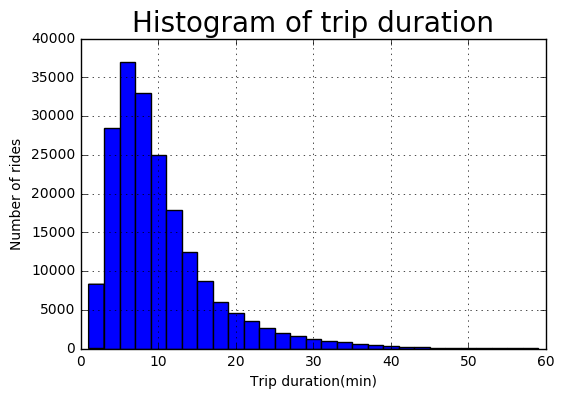

In [20]:
pl_duration = df['tripduration'].hist(bins = range(1,60,2))
pl_duration.set_xlabel('Trip duration(min)')
pl_duration.set_ylabel('Number of rides')
pl_duration.set_title('Histogram of trip duration',fontsize = 20)

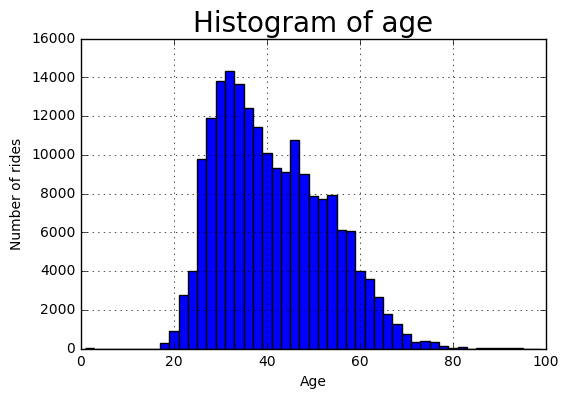

In [21]:
pl_age = df['age'].hist(bins = range(1,100,2))
pl_age.set_xlabel('Age')
pl_age.set_ylabel('Number of rides')
pl_age.set_title('Histogram of age',fontsize = 20)

In [23]:
# set up threshold as 10 mins and 40 years old
df['more_than_10mins'] = df['tripduration'] > 10
df['more_than_40_years_old'] = df['age'] > 40


In [24]:
df.head( n = 10)

,tripduration,birth year,age,more_than_10mins,more_than_40_years_old
0,13.350000,1978.0,38.0,True,False
1,6.316667,1993.0,23.0,False,False
2,41.233333,1969.0,47.0,True,True
3,13.633333,1985.0,31.0,True,False
4,9.066667,1957.0,59.0,False,True
5,11.950000,1979.0,37.0,True,False
6,21.766667,1983.0,33.0,True,False
7,15.216667,1955.0,61.0,True,True
8,12.650000,1985.0,31.0,True,False
9,9.750000,1982.0,34.0,False,False


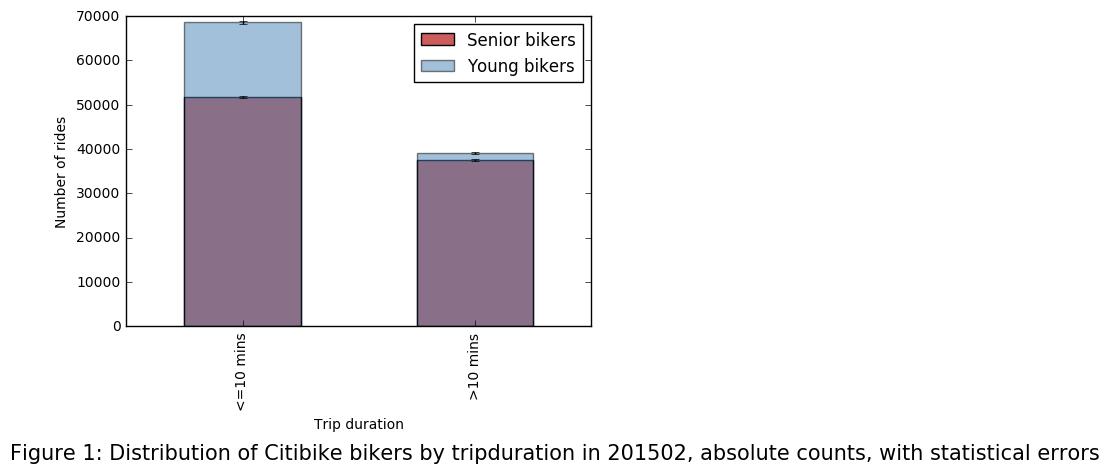

In [25]:
#from example 
#senior bikers group by tripduration
counts_senior = df.more_than_10mins[df.more_than_40_years_old == True].groupby([df.more_than_10mins]).count()
norm_s = 1
error_s = np.sqrt(counts_senior)
((counts_senior) / norm_s).plot(kind = 'bar', color = 'IndianRed',
                                yerr = [((error_s) / norm_s, (error_s) / norm_s)],
                                label = 'Senior bikers')

#youth bikers group by tripduration
counts_youth = df.more_than_10mins[df.more_than_40_years_old == False].groupby([df.more_than_10mins]).count()
counts_youth
norm_y = 1
error_y = np.sqrt(counts_youth)
ax = ((counts_youth) / norm_y).plot(kind = 'bar', color = 'SteelBlue', 
                                    yerr = [((error_y) / norm_y, (error_y) / norm_y)],
                                    alpha = 0.5, label = 'Young bikers')
ax.xaxis.set_ticklabels(['<=10 mins','>10 mins'])
ax.set_ylabel('Number of rides')
ax.set_xlabel('Trip duration')
ax.text( -1, -30000, 'Figure 1: Distribution of Citibike bikers by tripduration in ' + data_date
        + ', absolute counts, with statistical errors',fontsize = 15)
ax.legend()

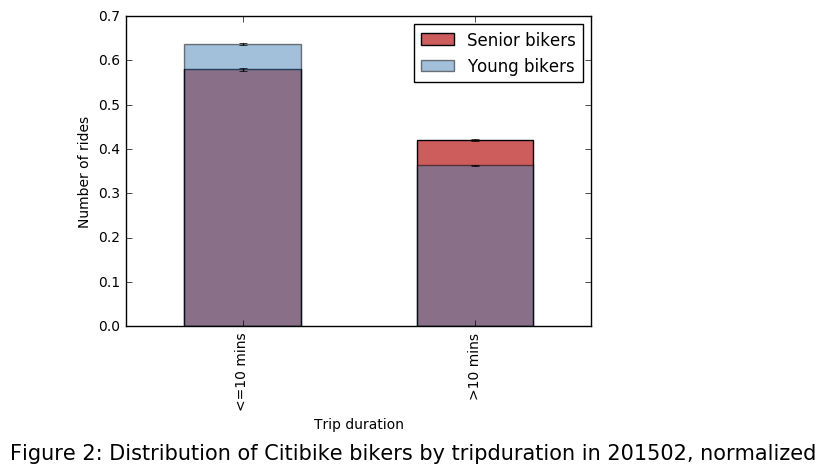

In [26]:
norm_s = counts_senior.sum()
error_s = np.sqrt(counts_senior)
((counts_senior) / norm_s).plot(kind="bar", color='IndianRed',  
                           yerr=[((error_s) / norm_s, (error_s) / norm_s)], 
                           label='Senior bikers')

norm_y = counts_youth.sum()
error_y = np.sqrt(counts_youth)
ax = ((counts_youth) / norm_y).plot(kind="bar", alpha=0.5, 
                                yerr=[((error_y) / norm_y, (error_y) / norm_y)], 
                                color='SteelBlue', label='Young bikers')

ax.xaxis.set_ticklabels(['<=10 mins','>10 mins'])
ax.set_ylabel('Number of rides')
ax.set_xlabel('Trip duration')
ax.text( -1, -0.3, 'Figure 2: Distribution of Citibike bikers by tripduration in ' + data_date
        + ', normalized',fontsize = 15)
ax.legend()

In [29]:

short_s = sum(counts_senior[:-1]) * 1.0 / norm_s  #fraction of women riding on week days
long_s = sum(counts_senior[-1:]) * 1.0 / norm_s  #fraction of women riding on weekends
eshort_s = np.sqrt(sum(error_s[:-1]**2)) / norm_s  #error on fraction number of women riding on week days
elong_s = np.sqrt(sum(error_s[-1:]**2)) / norm_s #error on fraction number of women riding on weekends

#same nomenclature as above
short_y = sum(counts_youth[:-1]) * 1.0 / norm_y
long_y = sum(counts_youth[-1:]) * 1.0 / norm_y
eshort_y = np.sqrt(sum(error_y[:-1]**2)) / norm_y
elong_y = np.sqrt(sum(error_y[-1:]**2)) / norm_y

print("Senior: Short trip:{0:.3f}, Long trip:{1:.3f}, Short trip error:{2:.3f}, Long trip error:{3:.3f}"\
      .format(short_s, long_s, eshort_s, elong_s))
print("Youth: Short trip:{0:.3f}, Long trip:{1:.3f}, Short trip error:{2:.3f}, Long trip error:{3:.3f}"\
      .format(short_y, long_y, eshort_y, elong_y))


Senior: Short trip:0.580, Long trip:0.420, Short trip error:0.003, Long trip error:0.002
Youth: Short trip:0.637, Long trip:0.363, Short trip error:0.002, Long trip error:0.002


In [30]:
P0mP1 = long_s - long_y
print ("difference between senior and youth for long trip duration: ", P0mP1)
if P0mP1 <= 0:
    # we are done...
    print("In accordance with Null Hypothesis")
else:
    # morework to do
    print ("We must check the significance before we reject the Null Hypothesis")


difference between senior and youth for long trip duration:  0.0575801486151
We must check the significance before we reject the Null Hypothesis


In [31]:
p = lambda p0, p1, n0, n1: (p0 * n0 + p1 * n1) / (n0 + n1)
se = lambda p, n0, n1: np.sqrt(p * (1 - p) * (1.0 / n0 + 1.0 / n1)) #standard error
zscore = lambda p0, p1, s : (p0 - p1) / s

# calculations

sp_stdev_sy = se(p(long_s, long_y, norm_s, norm_y), norm_s, norm_y)
# print (sp_stdev_mw)
z = zscore(long_s, long_y, sp_stdev_sy)
print ("The z statistics is %.2f"%z) 

The z statistics is 26.09


The largest number reported in z stats tables is (typically) 3, which gives a p value
$p < 0.0002$, which is smaller then my chosen $alpha=0.05$ - so yes, it is statistically significant (by a lot!)
We reject the Null Hypothesis that youth are more likely to commute in longer trip than senior $p < 0.05$